In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import talib

# Đọc dữ liệu
file_path = r'D:\startup\fx\download\EU\DAT_MT_EURUSD_M1_202402.csv'
data = pd.read_csv(file_path)
# Đổi tên cột
data.columns = ['ngay', 'gio', 'Open', 'High', 'Low', 'Close', 'Volume']
# Kết hợp hai cột ngày và giờ
data['timestamp'] = pd.to_datetime(data['ngay'] + ' ' + data['gio'])
# Xóa hai cột ngay và gio ban đầu
data.drop(columns=['ngay', 'gio'], inplace=True)
# Đặt cột timestamp làm index
data.set_index('timestamp', inplace=True)

In [3]:
#Tính toán các chỉ báo kỹ thuật
data['SMA'] = talib.SMA(data['Close'], timeperiod=20)
data['EMA'] = talib.EMA(data['Close'], timeperiod=20)
data['RSI'] = talib.RSI(data['Close'], timeperiod=14)
data['Bollinger_High'], data['Bollinger_Mid'], data['Bollinger_Low'] = talib.BBANDS(data['Close'], timeperiod=20)
data['MACD'], data['MACD_Signal'], data['MACD_Hist'] = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Xóa các hàng có giá trị NaN
data = data.dropna()

# Khám phá dữ liệu
print(data.head())


                        Open     High      Low    Close  Volume       SMA  \
timestamp                                                                   
2024-02-02 01:07:00  1.08794  1.08794  1.08792  1.08794       0  1.087914   
2024-02-02 01:08:00  1.08794  1.08804  1.08793  1.08804       0  1.087906   
2024-02-02 01:09:00  1.08804  1.08807  1.08801  1.08806       0  1.087901   
2024-02-02 01:10:00  1.08806  1.08806  1.08801  1.08801       0  1.087894   
2024-02-02 01:11:00  1.08801  1.08804  1.08800  1.08804       0  1.087889   

                          EMA        RSI  Bollinger_High  Bollinger_Mid  \
timestamp                                                                 
2024-02-02 01:07:00  1.087878  54.902006        1.088247       1.087914   
2024-02-02 01:08:00  1.087893  60.722342        1.088221       1.087906   
2024-02-02 01:09:00  1.087909  61.784633        1.088200       1.087901   
2024-02-02 01:10:00  1.087919  57.591118        1.088176       1.087894   
2024-02-02

In [4]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = data[['SMA', 'EMA', 'RSI', 'Bollinger_High', 'Bollinger_Low', 'MACD']]
y = data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Xây dựng và huấn luyện mô hình
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Đánh giá mô hình
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.3096559293431441e-08


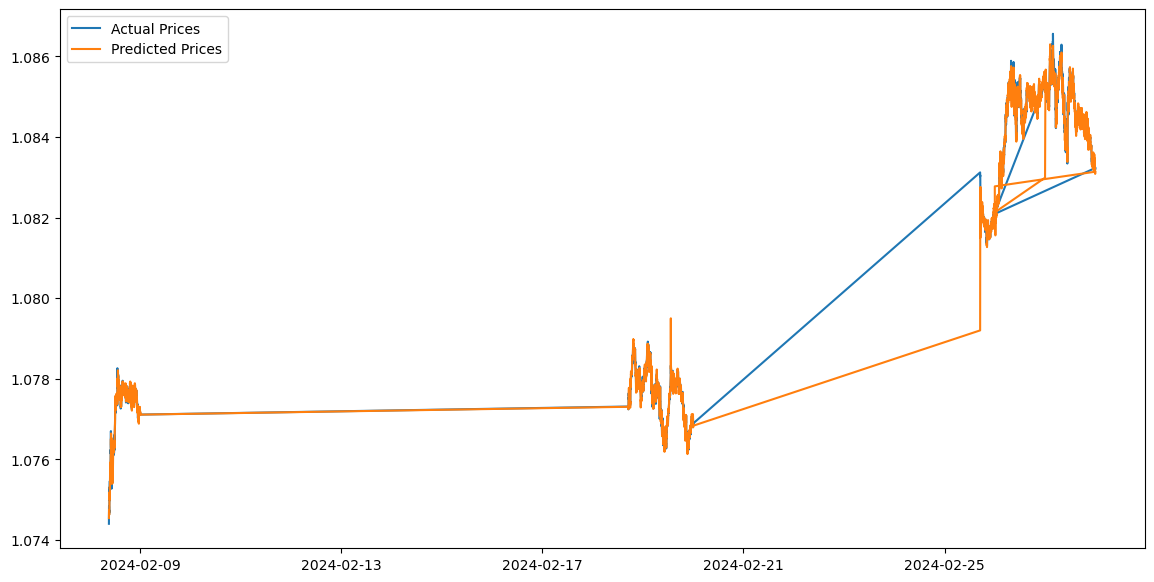

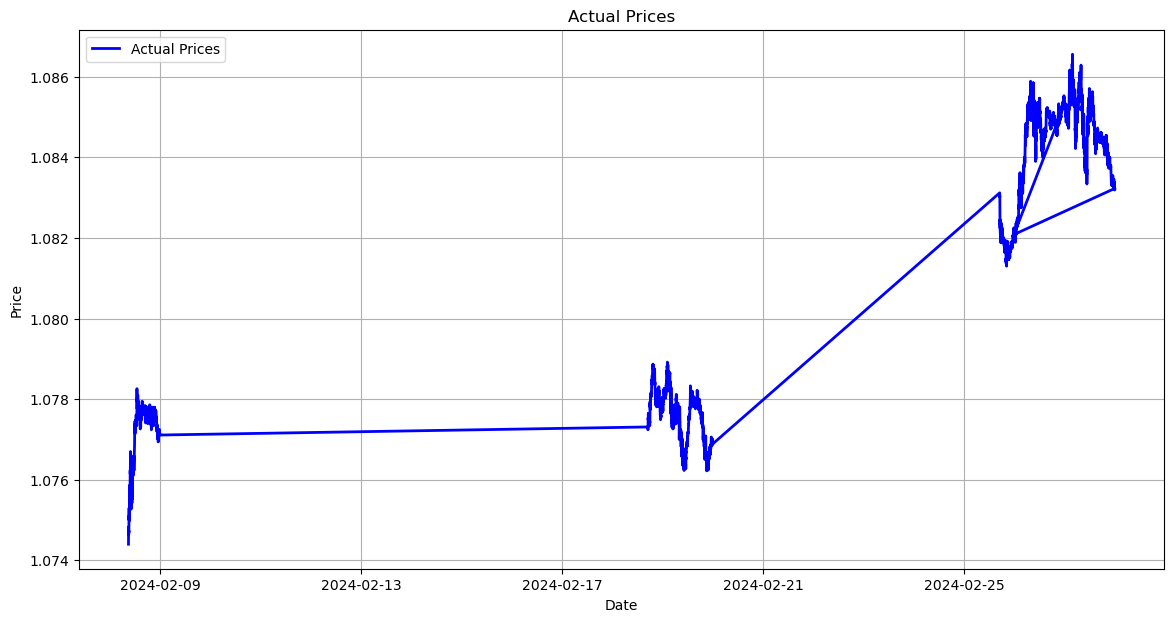

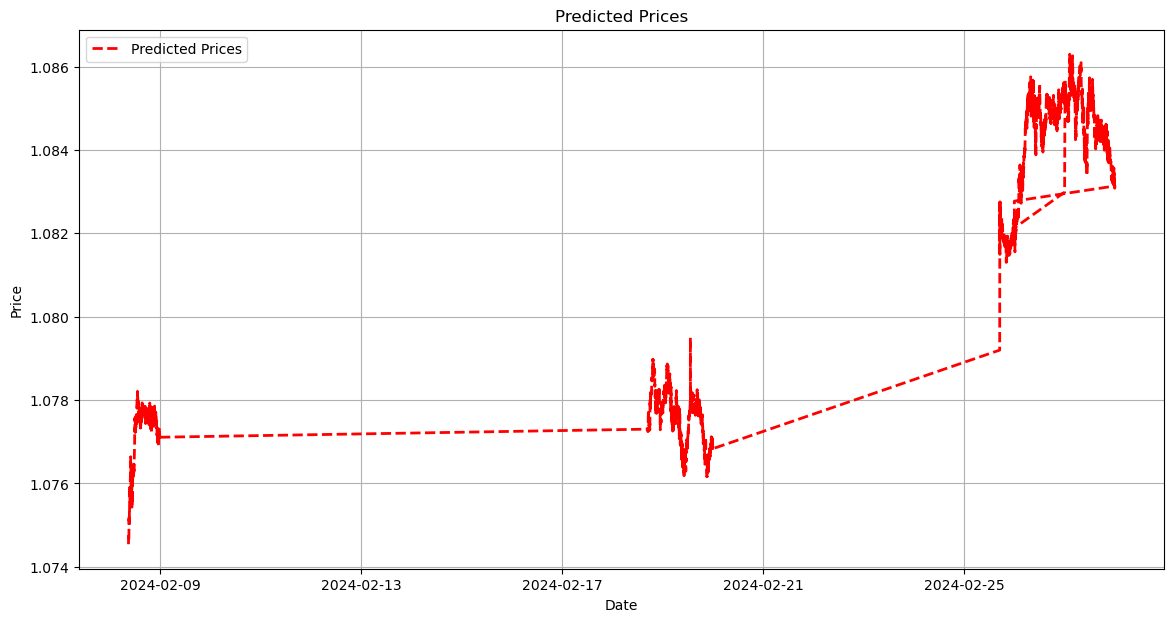

In [6]:
# Hiển thị kết quả dự đoán
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Prices')
plt.plot(y_test.index, y_pred, label='Predicted Prices')
plt.legend()
plt.show()
# Biểu đồ giá thực tế
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual Prices')
plt.legend()
plt.grid(True)
plt.show()

# Biểu đồ giá dự đoán
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red', linestyle='--', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()